In [1]:
import numpy as np
import torch
from scipy import stats

from sampling_example import *

import matplotlib.pyplot as plt

In [2]:
# Select device: 'cpu', 'cuda', 'mps',..
device = 'cpu'

# Sampling from a standard Gaussian distribution

In [5]:
# Dimension of the distribution
# must be >= 2
dim = 2 
#dim = 10000

# Initialization point
theta_zero = torch.zeros(dim,device=device)

# Extract samples
log = langevin_sample(theta_zero,
                      num_samples_wanted = 10000,
                      lr = 0.1,
                      device = device,
                      dim = dim)
samples = log['thetas']

Training finished 10     Total iterations: 10


# Plot norm of samples

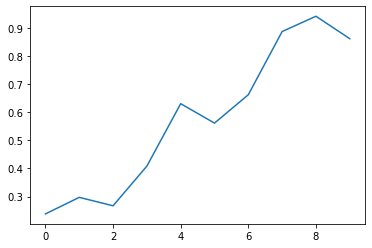

In [6]:
losses = list()
for sample in samples:
    loss = np.linalg.norm(sample)
    losses.append(loss)
plt.plot(losses)

# Plot first two dimensions of the samples

In [7]:
x = list()
y = list()
for sample in samples:
    x.append(sample[0].item())
    y.append(sample[1].item())
print('Number of samples:', len(samples))

Number of samples: 10


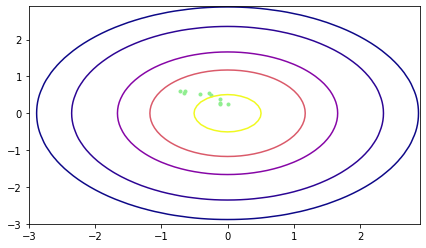

In [8]:
x2, y2 = np.mgrid[-3:3:.1, -3:3:.1]
sigma = 1.
rv = stats.multivariate_normal([0., 0.], [[sigma, 0.], [0.,sigma]])
data = np.dstack((x2, y2))
z = rv.pdf(data)
fig = plt.figure(figsize=(7,4))
cp = plt.contour(x2, y2, z, cmap='plasma', levels = [0.0025, 0.01, 0.04, 0.08, 0.14])
plt.scatter(x,y,marker='.', color='lightgreen')
plt.show()

# Plor first dimension of the samples

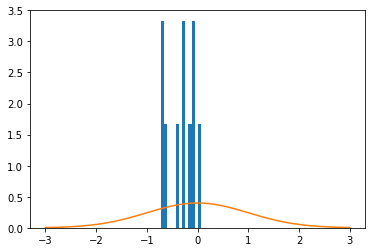

In [9]:
a = plt.hist(x, bins=100, range=(-3,3), density=True)
ax = np.linspace(-3,3,100)
plt.plot(ax, stats.norm.pdf(ax, 0, 1))